Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

The dataset is extracted from kaggle.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 



Independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported




Steps to Follow for the Project: The dataset contains 14 features and 32561 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [2]:
# Loading the dataset downloaded from kaggle
claim_dt=pd.read_csv('Automobile_insurance_fraud.csv')
claim_dt.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [3]:
claim_dt.shape # to determine the shape of the dataset

(1000, 40)

In [4]:
claim_dt.info() # to determine the data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
# groupby column data types
claim_dt.columns.groupby(claim_dt.dtypes)

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

In [6]:
# number of columns of a particular data type
print("No of columns for {} is {}.".format(list(claim_dt.columns.groupby(claim_dt.dtypes).keys())[0], len(claim_dt.columns.groupby(claim_dt.dtypes)[list(claim_dt.columns.groupby(claim_dt.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(claim_dt.columns.groupby(claim_dt.dtypes).keys())[1], len(claim_dt.columns.groupby(claim_dt.dtypes)[list(claim_dt.columns.groupby(claim_dt.dtypes).keys())[1]])))
print("No of columns for {} is {}.".format(list(claim_dt.columns.groupby(claim_dt.dtypes).keys())[2], len(claim_dt.columns.groupby(claim_dt.dtypes)[list(claim_dt.columns.groupby(claim_dt.dtypes).keys())[2]])))

No of columns for int64 is 17.
No of columns for float64 is 2.
No of columns for object is 21.


# Data Cleaning and Transfroming (Exploratory Data Analysis)

In [7]:
# Checking for null values
claim_dt.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
# Checking presnce of ? in dataset
claim_dt.isin(['?']).sum().any()

True

In [9]:
# replacing ? with NAN
claim_dt=claim_dt.replace('?',np.NAN)

In [10]:
# Checking for null values
claim_dt.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [11]:
# There are missing values in collisio_type, property_damage, police_report_available  and c39

In [12]:
# Imputating Missing value with mode for categorical features because they are categorical features
claim_dt['property_damage'].fillna(claim_dt['property_damage'].mode()[0],inplace=True)
claim_dt['police_report_available'].fillna(claim_dt['police_report_available'].mode()[0],inplace=True)
claim_dt['collision_type'].fillna(claim_dt['collision_type'].mode()[0],inplace=True)

In [13]:
# Droping unnecessary columns, they do not have any effect on the dataset
claim_dt.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

In [14]:
# Checking for null values
claim_dt.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

In [15]:
# Checking for duplicated values since the dataset is large
claim_dt.duplicated().sum()


0

<AxesSubplot:>

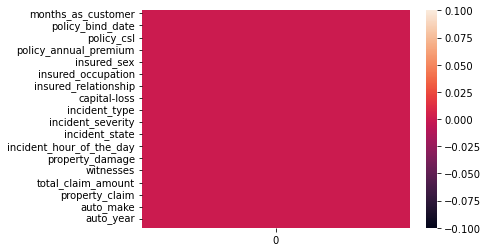

In [16]:
# Using Heat map to check for null values
sns.heatmap(claim_dt.isnull().sum().to_frame())

# Univarite Analysis

In [17]:
new_claim_dt=claim_dt.copy()

In [18]:
# Converting Date into Year, Month, day 

new_claim_dt[['pYear','pMonth','pDay']] = new_claim_dt['policy_bind_date'].str.split("-",expand = True)
# splitting the date into year,month day using python split function

In [19]:
new_claim_dt[['pYear','pMonth','pDay']]=new_claim_dt[['pYear','pMonth','pDay']].astype(int)

In [20]:
# Converting Date into Year, Month, day 

new_claim_dt[['iYear','iMonth','iDay']] = new_claim_dt['incident_date'].str.split("-",expand = True)
# splitting the date into year,month day using python split function

In [21]:
new_claim_dt[['iYear','iMonth','iDay']]=new_claim_dt[['iYear','iMonth','iDay']].astype(int)

In [22]:
# droping one column of year to avoid redundant data
new_claim_dt.drop(['policy_bind_date','incident_date'],axis=1, inplace=True)
new_claim_dt.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,pYear,pMonth,pDay,iYear,iMonth,iDay
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


In [23]:
# changeing into 0 and 1 of raintoday and raintomorrow
new_claim_dt['insured_sex'].replace({'FEMALE': 0, 'MALE': 1},inplace = True)
#new_rain_dt['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [24]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
Cat_Var = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
le = LabelEncoder()
for i in Cat_Var:
    new_claim_dt[i] = le.fit_transform(new_claim_dt[i])
new_claim_dt.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,pYear,pMonth,pDay,iYear,iMonth,iDay
0,328,48,2,250/500,1000,1406.91,0,1,4,2,...,10,1,2004,1,17,10,2014,25,1,2015
1,228,42,1,250/500,2000,1197.22,5000000,1,4,6,...,8,12,2007,1,27,6,2006,21,1,2015
2,134,29,2,100/300,2000,1413.14,5000000,0,6,11,...,4,30,2007,0,6,9,2000,22,2,2015
3,256,41,0,250/500,2000,1415.74,6000000,0,6,1,...,3,34,2014,1,25,5,1990,10,1,2015
4,228,44,0,500/1000,1000,1583.91,6000000,1,0,11,...,0,31,2009,0,6,6,2014,17,2,2015


In [25]:
 new_claim_dt.describe()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_make,auto_model,auto_year,fraud_reported,pYear,pMonth,pDay,iYear,iMonth,iDay
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,203.954000,38.948000,1.01400,1136.000000,1256.406150,1.101000e+06,0.463000,2.966000,6.653000,9.731000,...,6.546000,19.318000,2005.103000,0.247000,15.448000,6.559000,2001.604000,14.995000,1.496000,2015.0
std,115.113174,9.140287,0.83096,611.864673,244.167395,2.297407e+06,0.498879,1.948497,4.019048,5.674049,...,4.034869,11.136107,6.015861,0.431483,8.808001,3.499824,7.360391,8.670995,0.523697,0.0
min,0.000000,19.000000,0.00000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,2015.0
25%,115.750000,32.000000,0.00000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,5.000000,...,3.000000,10.000000,2000.000000,0.000000,8.000000,3.000000,1995.000000,7.750000,1.000000,2015.0
50%,199.500000,38.000000,1.00000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,10.000000,...,7.000000,20.000000,2005.000000,0.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,2015.0
75%,276.250000,44.000000,2.00000,2000.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,15.000000,...,10.000000,29.000000,2010.000000,0.000000,23.000000,10.000000,2008.000000,22.000000,2.000000,2015.0
max,479.000000,64.000000,2.00000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,19.000000,...,13.000000,38.000000,2015.000000,1.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,2015.0


# Univarite Analysis

In [26]:
numerical_feature = [feature for feature in new_claim_dt.columns if new_claim_dt[feature].dtypes != 'O']

In [27]:
discrete_feature=[feature for feature in numerical_feature if len( new_claim_dt[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

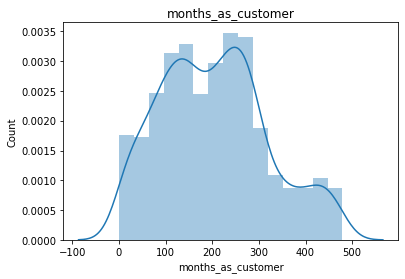

<Figure size 1080x1080 with 0 Axes>

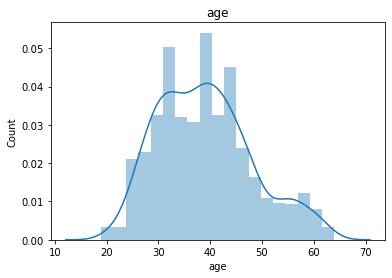

<Figure size 1080x1080 with 0 Axes>

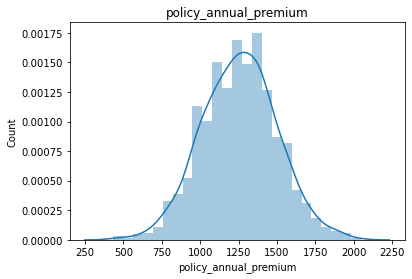

<Figure size 1080x1080 with 0 Axes>

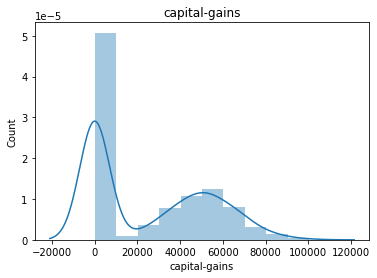

<Figure size 1080x1080 with 0 Axes>

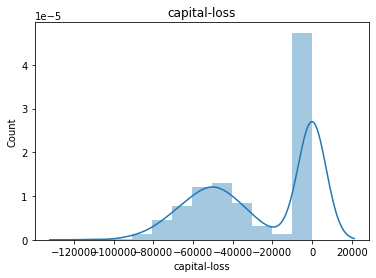

<Figure size 1080x1080 with 0 Axes>

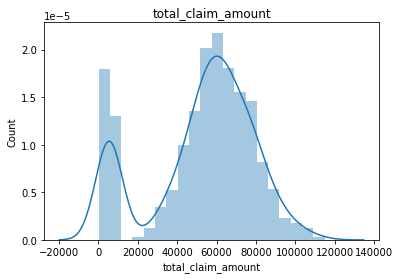

<Figure size 1080x1080 with 0 Axes>

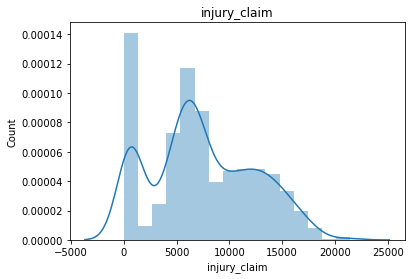

<Figure size 1080x1080 with 0 Axes>

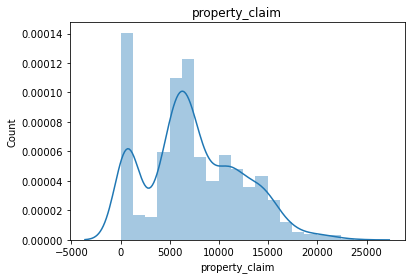

<Figure size 1080x1080 with 0 Axes>

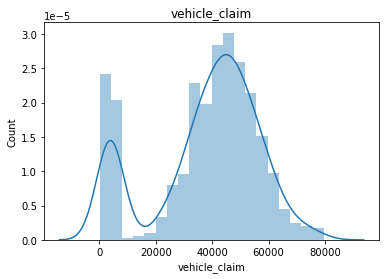

<Figure size 1080x1080 with 0 Axes>

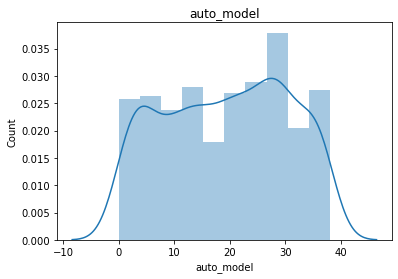

<Figure size 1080x1080 with 0 Axes>

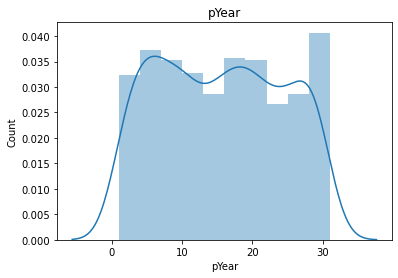

<Figure size 1080x1080 with 0 Axes>

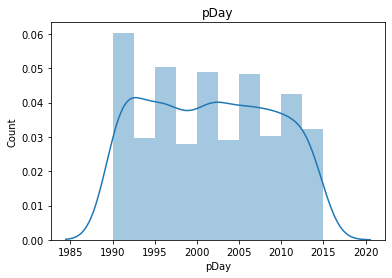

<Figure size 1080x1080 with 0 Axes>

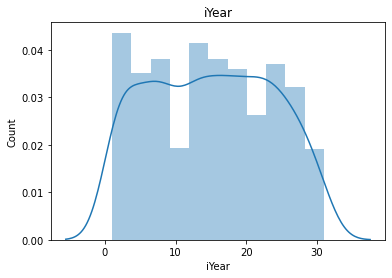

<Figure size 1080x1080 with 0 Axes>

In [28]:
# visualize 
for feature in continuous_feature:
    #data=df.copy()
    data=new_claim_dt
    sns.distplot(new_claim_dt[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [29]:
# Determine the unique values for each region
fraud_status = new_claim_dt["fraud_reported"].value_counts()
fraud_status

0    753
1    247
Name: fraud_reported, dtype: int64

                           Target Variable Distribution                          


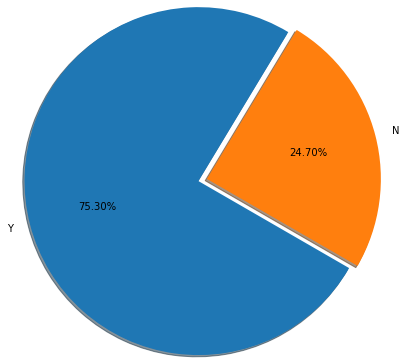

In [30]:
labels = ['Y','N']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mTarget Variable Distribution'.center(85))
plt.pie(new_claim_dt["fraud_reported"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

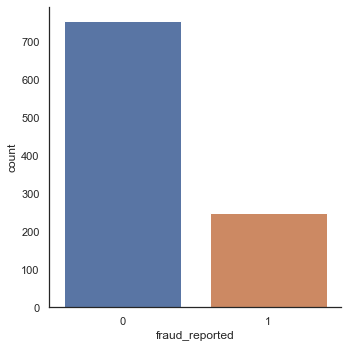

In [31]:
#Analysis of Income Status
sns.set(style="white")
sns.catplot(x = 'fraud_reported', data =new_claim_dt , kind = 'count',margin_titles =False,label=labels)

# Bivarite Analysis

In [32]:
# function to Visualizing Categorical values using Box plot
def features_plot(Categorical_column):
    plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    col_name=['insured_sex','policy_state','insured_education_level','insured_occupation','insured_hobbies','incident_type']
    sns.countplot(x=Categorical_column,hue='fraud_reported', data=claim_dt)
    plt.title(f"{Categorical_column.title()} vs fraud_reported",fontweight="black",size=25,pad=10,)
    plt.legend(title='fraud_reported', loc='upper right', labels=['Y','N'])
    col_values = claim_dt[Categorical_column].value_counts()
    plt.tight_layout()

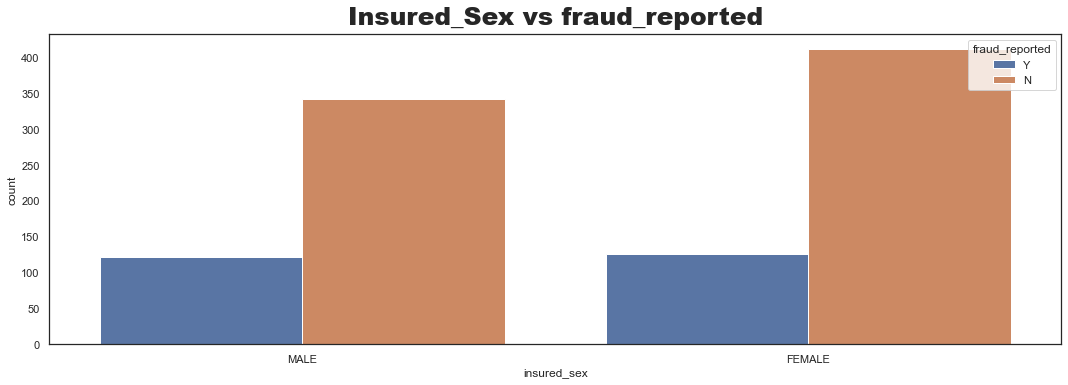

In [33]:
features_plot('insured_sex')

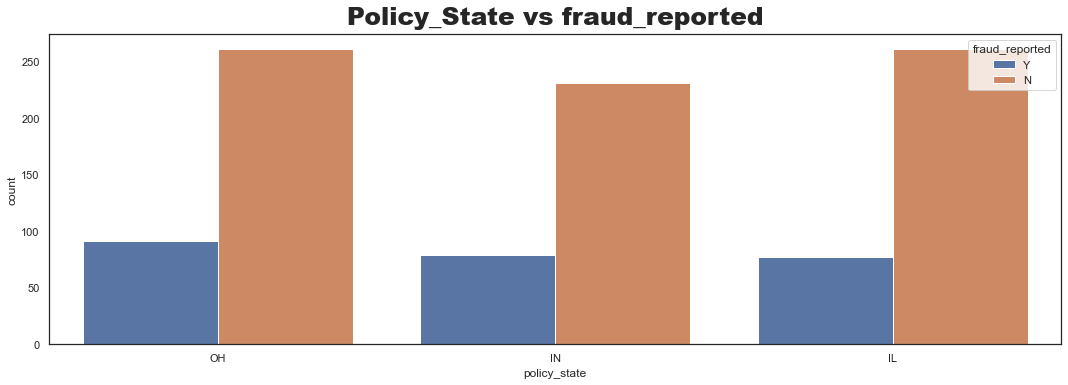

In [34]:
features_plot('policy_state')

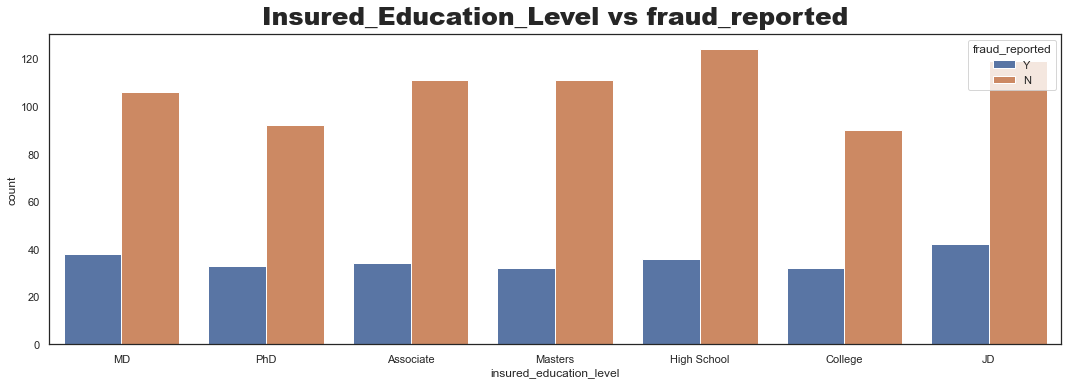

In [35]:
features_plot('insured_education_level')

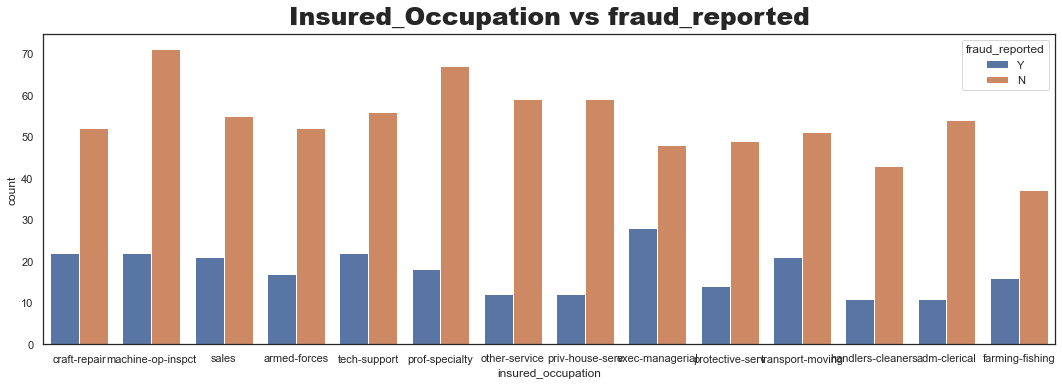

In [39]:
features_plot('insured_occupation')

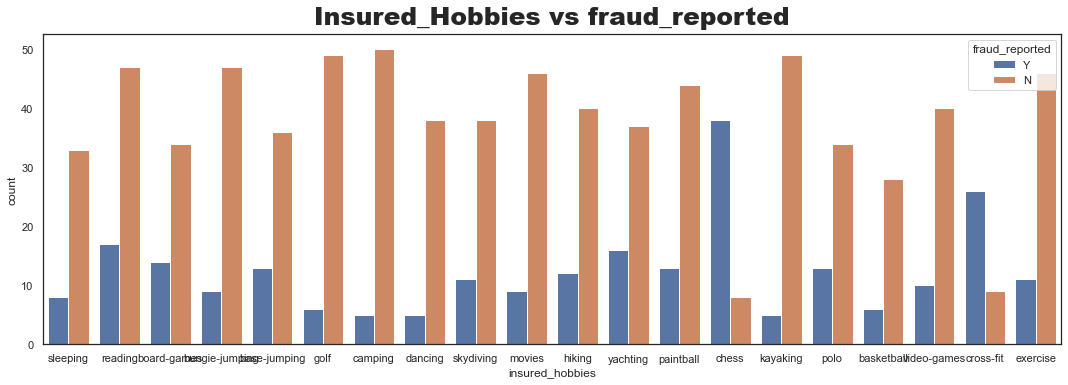

In [40]:
features_plot('insured_hobbies')

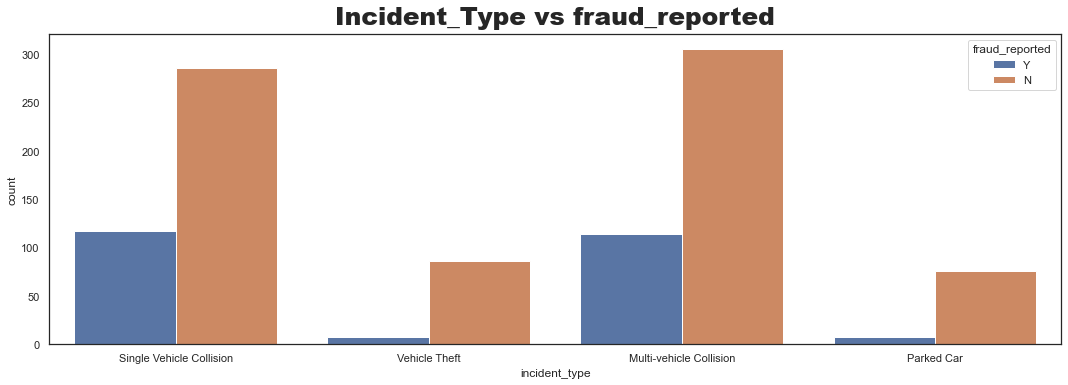

In [41]:
features_plot('incident_type')

# Multivarite Analysis

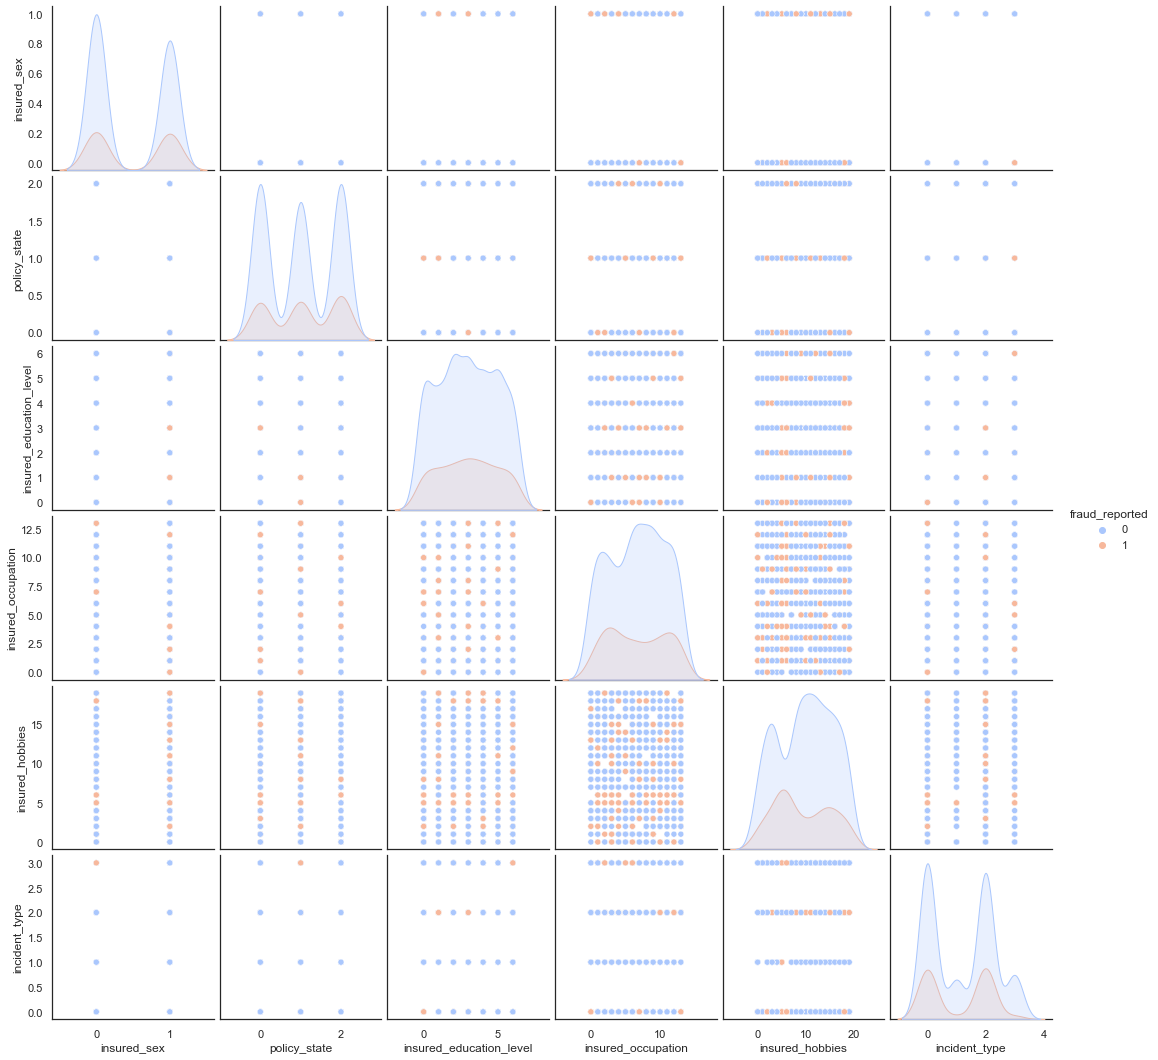

In [42]:
#Pairplot of all numerical variables
sns.pairplot(new_claim_dt,vars=['insured_sex','policy_state','insured_education_level','insured_occupation','insured_hobbies','incident_type'],hue='fraud_reported',palette="coolwarm")
plt.show()
#plt.show()

# Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

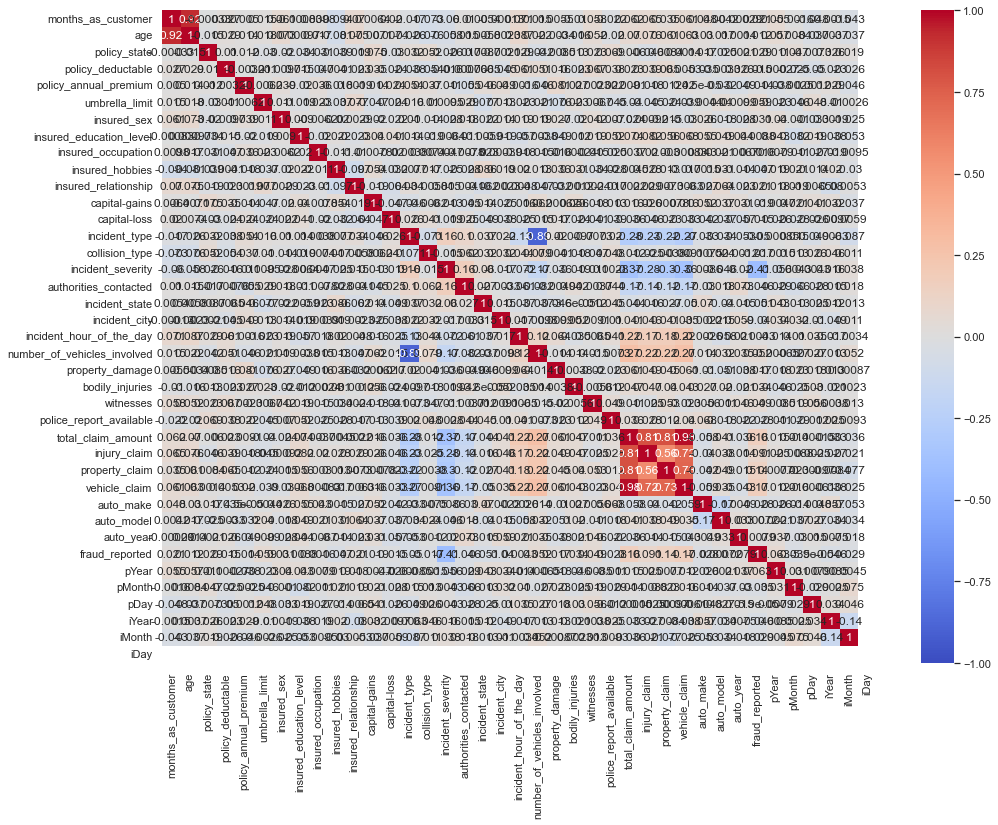

In [43]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(new_claim_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=new_claim_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

injury_claim,property_claim,vehicle_claim are highly correlated with each other.

In [44]:

# Checking for Outliers
# Checking for skewness of the data to determine outliers
new_claim_dt.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


In [45]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
new_claim_dt[skew] = scaler.fit_transform(new_claim_dt[skew].values)

# Data Preprocessing for Classification problem fort Task 1


In [50]:
# Spliting and extracting policy_csl at '/'
new_claim_dt['CSL_P']=new_claim_dt.policy_csl.str.split('/',expand=True)[0]
new_claim_dt['CSL_A']=new_claim_dt.policy_csl.str.split('/',expand=True)[1]

In [51]:
# Separating feature data and Label data
X = new_claim_dt.drop(['fraud_reported','policy_csl'],axis=1)
y= new_claim_dt['fraud_reported']

In [52]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.25,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((750, 40), (250, 40), (750,), (250,))

# Build/Test multiple models

In [63]:
#Using Logistic Regression to  train a logistic regression model on the training set
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
# Predicting the data model
lreg_pred = lreg.predict(X_test) # Predicting the model
lreg_pred.shape

(250,)

In [64]:
#Accuracy and various Metrics for the model
LR_testing=round(lreg.score(X_train, y_train)*100,2)
LR_mae=mean_absolute_error(lreg_pred,y_test)
LR_mse=mean_squared_error(lreg_pred,y_test)
LR_rmse=np.sqrt(mean_squared_error(lreg_pred,y_test))
LR_r2=r2_score(y_test,lreg_pred)*100
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)
print("Accuracy Score of Testing Data is =>",LR_testing)

Mean absolute error  => 0.272
Mean squared error  => 0.272
Root Mean squared error  => 0.521536192416212
R2 Score  => -38.651007258788006
Accuracy Score of Testing Data is => 81.2


In [65]:
# Create instances of all other classifier- Using other models
rfc=RandomForestClassifier()
et =ExtraTreesClassifier() 
bmc = BaggingClassifier() 
abc = AdaBoostClassifier()
gbc=GradientBoostingClassifier()
rft=RandomForestClassifier()
#knn= KNeighborsClassifier()
svc=SVC(random_state=42)
dt=DecisionTreeClassifier(random_state=42)

In [67]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
#Train the model using the training sets y_pred=clf.predict(X_test), prediction on test set
for clf in (rfc, et, bmc, abc,gbc,rft,svc,dt):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('\n')                                        
    print(' Error of ', clf, ':' )
    print('Mean absolute error :', mean_absolute_error(y_test, y_pred))
    print('Mean squared error :', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('\n')

    print(' R2 Score :',r2_score(y_test, y_pred))
    #print(r2_score(y_test,y_pred)*100) 
    print(accuracy_score(y_test, y_pred)*100)
    print('\n')
    
    #print('=============================================================================================================='))



 Error of  RandomForestClassifier() :
Mean absolute error : 0.244
Mean squared error : 0.244
Root Mean Squared Error: 0.4939635614091388


 R2 Score : -0.24378109452736307
75.6




 Error of  ExtraTreesClassifier() :
Mean absolute error : 0.28
Mean squared error : 0.28
Root Mean Squared Error: 0.5291502622129182


 R2 Score : -0.42728978060517075
72.0




 Error of  BaggingClassifier() :
Mean absolute error : 0.18
Mean squared error : 0.18
Root Mean Squared Error: 0.4242640687119285


 R2 Score : 0.0824565696109617
82.0




 Error of  AdaBoostClassifier() :
Mean absolute error : 0.216
Mean squared error : 0.216
Root Mean Squared Error: 0.46475800154489


 R2 Score : -0.10105211646684609
78.4




 Error of  GradientBoostingClassifier() :
Mean absolute error : 0.188
Mean squared error : 0.188
Root Mean Squared Error: 0.433589667773576


 R2 Score : 0.04167686159367112
81.2




 Error of  RandomForestClassifier() :
Mean absolute error : 0.224
Mean squared error : 0.224
Root Mean Squared

# Cross Validation for the Models

In [68]:

ExtraTreesClassifier() 
BaggingClassifier() 
AdaBoostClassifier()
GradientBoostingClassifier()
RandomForestClassifier()
#KNeighborsClassifier()
SVC(random_state=42)
DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(random_state=42)

In [69]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X_Scalar,y):
    rmse =(cross_val_score(model, X_Scalar,y, cv=6))
    return(rmse)



models = [RandomForestClassifier(),
         BaggingClassifier(),
         AdaBoostClassifier(),
         AdaBoostClassifier(),
         GradientBoostingClassifier(),
         #KNeighborsClassifier(),
         SVC(random_state=42),
         DecisionTreeClassifier(random_state=42), 
         ]
          
          
names = [rfc, et, bmc, abc,gbc,rft,svc,dt]
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

RandomForestClassifier()  : 75.7028, 1.574790
ExtraTreesClassifier()  : 82.4093, 3.381188
BaggingClassifier()  : 80.2059, 2.303134
AdaBoostClassifier()  : 80.2059, 2.303134
GradientBoostingClassifier()  : 82.0065, 2.354800
RandomForestClassifier()  : 75.3000, 0.211710
SVC(random_state=42)  : 77.6068, 2.712347


# Hyper Parameter Tuning : GridSearchCV for Task 1

In [71]:
param_grid ={'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [72]:
grid_search = GridSearchCV(ExtraTreesClassifier(),param_grid)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]})

In [73]:
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

ExtraTreesClassifier(max_depth=30, max_features='sqrt', min_samples_split=11)
Best score: 0.7826666666666666
Best params: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 11, 'n_estimators': 100}


In [74]:
y_pred_grid=grid_search.best_estimator_.predict(X_test) # With best parameter
y_pred_grid

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
print('MSE:',mean_squared_error(y_pred_grid,y_test))
print('MAE:',mean_absolute_error(y_pred_grid,y_test))
print('Accuracy Score:',accuracy_score(y_pred_grid,y_test)*100)

MSE: 0.288
MAE: 0.288
Accuracy Score: 71.2


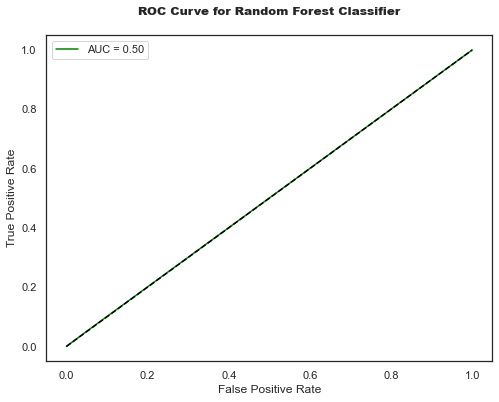

In [76]:
#ROC Curve and Area Under the Curve (AUC) for Decision Tree
y_pred_proba =grid_search.best_estimator_.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_grid)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_grid)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

# Saving the best Model for Task 1

In [77]:
joblib.dump(grid_search.best_estimator_,'Claim InsuranceFinal Status.obj')

['Claim InsuranceFinal Status.obj']

,Y Test,Pred
521,0,0
737,0,0
740,0,0
660,0,0
411,0,0
...,...,...
109,1,0
430,0,0
77,0,0
84,1,0


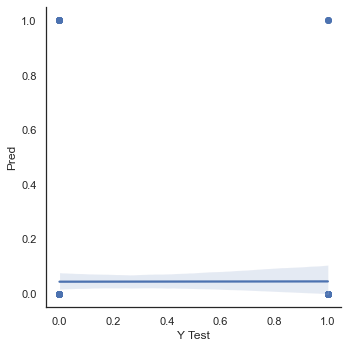

In [78]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_grid},columns=['Y Test','Pred'])
#cmp_data = pd.DataFrame({'Y Test':np.array(y_test) , 'Pred':np.array(y_pred_grid)},index= range(len(y_test)))
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data